In [275]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
##importing the required libraries for Analysis


from numpy import sqrt

from pandas import Grouper
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose
## with the help of this we will be able to creat graphs for the dfferent components of time series data 
#like trends, level, sesional components and residual data

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [276]:
df=pd.read_csv('airlinesdata.csv',header=0,parse_dates=True)

In [277]:
df.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [278]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(df))

In [279]:
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
      

In [280]:
df['Month'] = dates.month
df['Year'] = dates.year

In [281]:
df.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [282]:
df.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [283]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
df = df[['Month','Year','Passengers']]

In [284]:
df.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [285]:
df['Date'] = dates
df.set_index('Date',inplace=True)

In [286]:
df.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


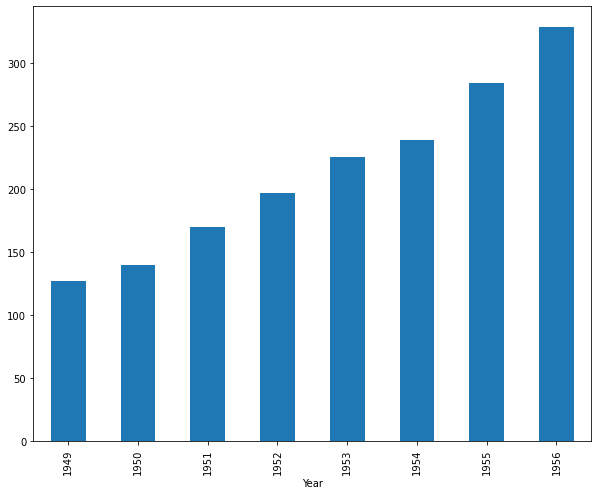

In [287]:
plt.figure(figsize=(10,8))
df.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

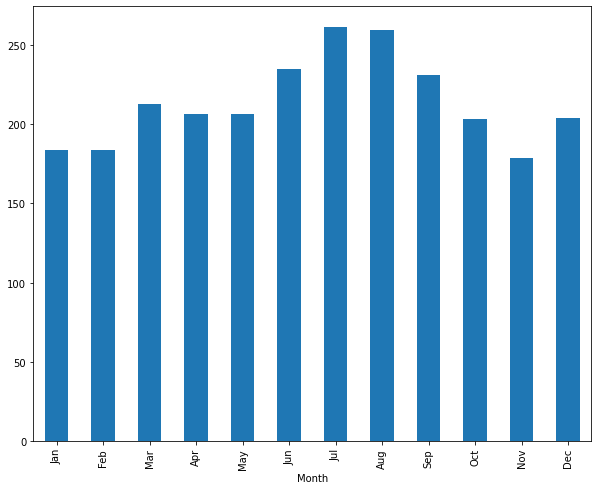

In [288]:
plt.figure(figsize=(10,8))
df.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [290]:
df_count = df['Passengers']

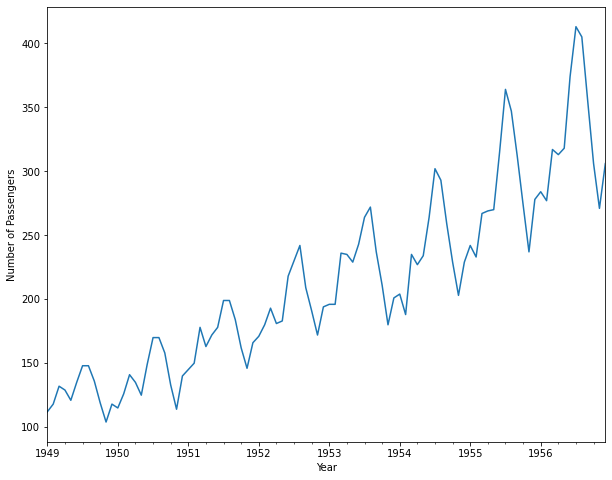

In [291]:
plt.figure(figsize=(10,8))
df_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [293]:
import statsmodels.api as sm
import warnings

In [294]:
decompose = sm.tsa.seasonal_decompose(df_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

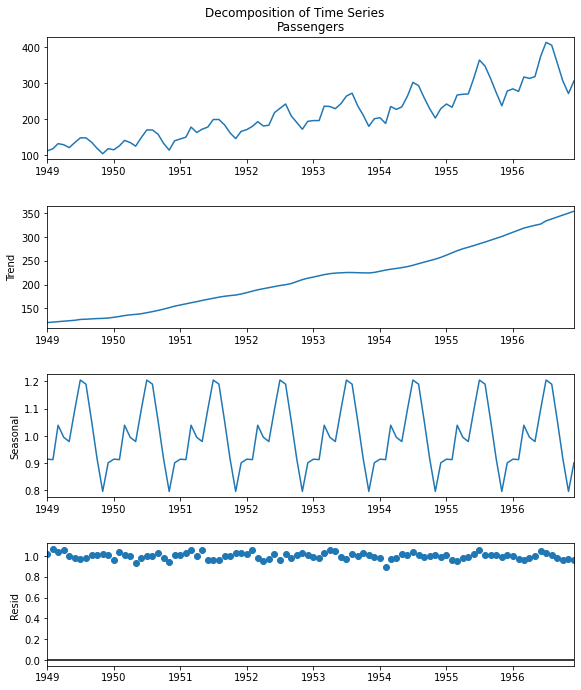

In [295]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

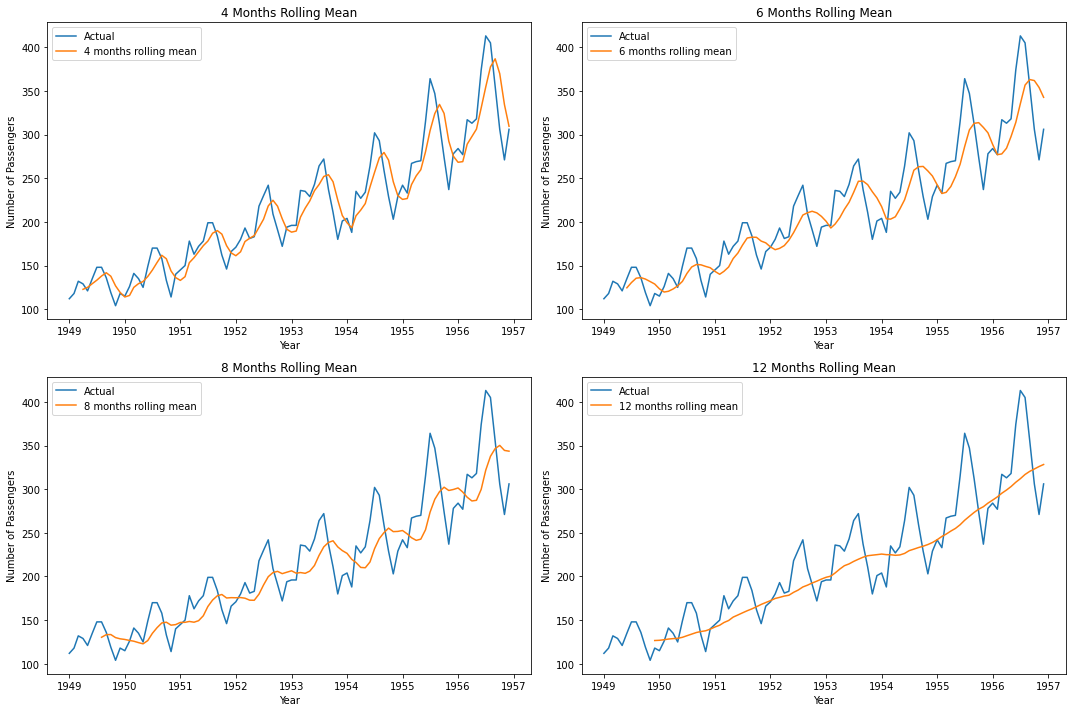

In [298]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(df.index,df_count,label='Actual')
axes[0][0].plot(df.index,df_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(df.index,df_count,label='Actual')
axes[0][1].plot(df.index,df_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(df.index,df_count,label='Actual')
axes[1][0].plot(df.index,df_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(df.index,df_count,label='Actual')
axes[1][1].plot(df.index,df_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [299]:
df.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


In [301]:

monthly = pd.pivot_table(data=df,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [302]:
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


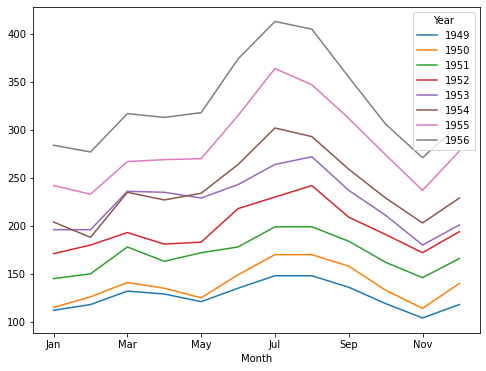

In [303]:
monthly.plot(figsize=(8,6))
plt.show()

In [304]:
yearly = pd.pivot_table(data=df,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306


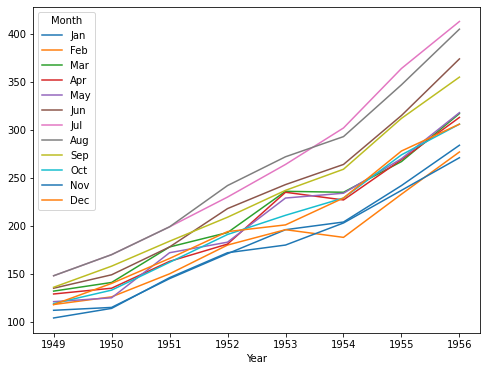

In [305]:
yearly.plot(figsize=(8,6))
plt.show()

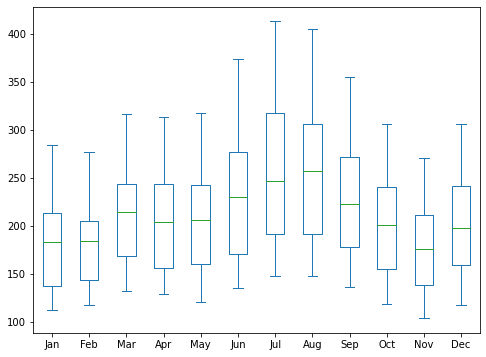

In [306]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

In [307]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_count)

(1.3402479596467032,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [308]:
adfuller_results = pd.Series(adfuller(df_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(df_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


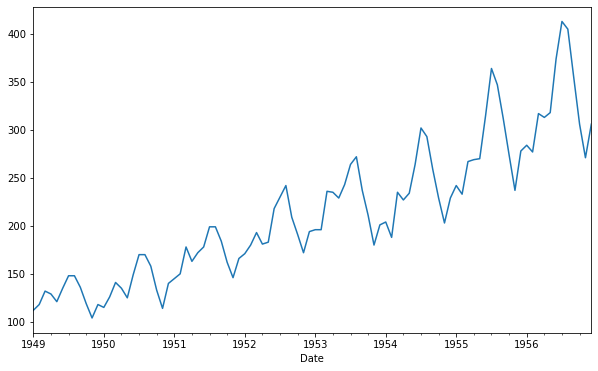

In [310]:
df_count.plot()
plt.show()

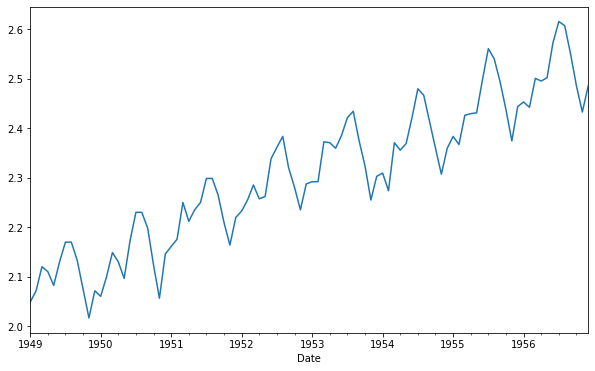

In [311]:
df_log = np.log10(df_count)
df_log.plot()
plt.show()

In [312]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_log)
adfuller_results = pd.Series(adfuller(df_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(df_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


In [314]:
diff1 = df_count.diff(1)
diff1.head()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

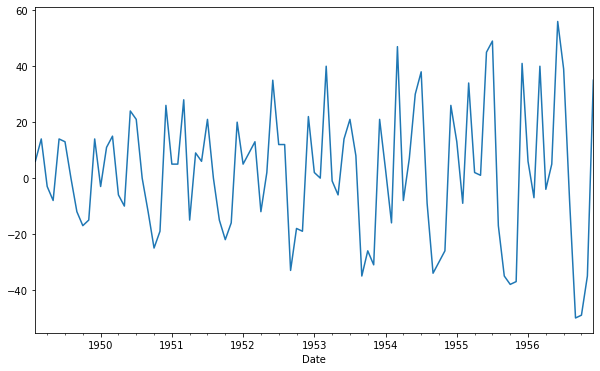

In [315]:
diff1.dropna(axis=0,inplace=True)
diff1.plot()
plt.show()

In [316]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [318]:
log_diff1 = df_log.diff(1)
log_diff1.head()

Date
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
Name: Passengers, dtype: float64

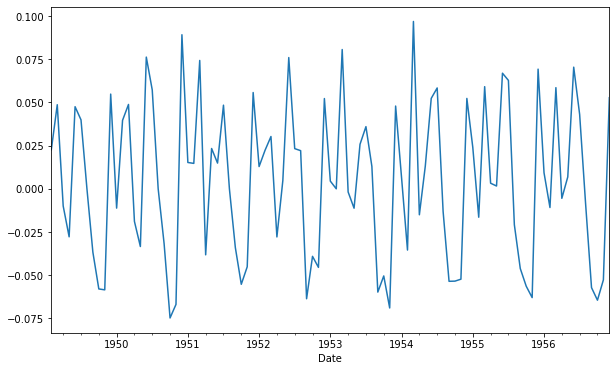

In [319]:
log_diff1.dropna(axis=0,inplace=True)
log_diff1.plot()
plt.show()

In [320]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [327]:
log_diff2 = df_log.diff(2)
log_diff2.head()

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.071356
1949-04-01    0.038708
1949-05-01   -0.037789
Name: Passengers, dtype: float64

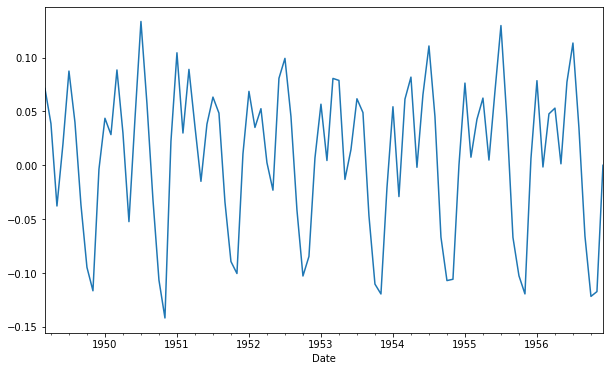

In [328]:
log_diff2.dropna(axis=0,inplace=True)
log_diff2.plot()
plt.show()

In [321]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [322]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [323]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [324]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAXNonexNone12 model - AIC:inf


In [329]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [330]:
sarima_results = sarima.fit()
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Thu, 16 Jun 2022   AIC                           -401.141
Time:                                    23:20:28   BIC                           -389.231
Sample:                                03-01-1949   HQIC                          -396.366
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3146      0.118     -2.670      0.008      -0.546      -0.084
ma.L1          0.9998     23.486   

In [332]:
df_count.tail(15)

Date
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
Name: Passengers, dtype: int64

In [333]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)
prediction.predicted_mean

1960-01-01    0.069684
Freq: MS, dtype: float64

In [334]:
predicted_values = np.power(10,prediction.predicted_mean)
predicted_values

1960-01-01    1.174042
Freq: MS, dtype: float64

In [336]:
actual = df_count['1960-01-01':]
actual


Series([], Name: Passengers, dtype: int64)

In [337]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

nan

In [338]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

nan

In [339]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [340]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1957-01-01,0.034231,0.102556
1957-02-01,-0.038553,0.043524
1957-03-01,0.012605,0.095921
1957-04-01,0.015611,0.099038
1957-05-01,-0.045419,0.038014


In [341]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1957-01-01,0.034231,0.102556
1957-02-01,-0.038553,0.043524
1957-03-01,0.012605,0.095921
1957-04-01,0.015611,0.099038
1957-05-01,-0.045419,0.038014


In [342]:
n_steps = 36
idx = pd.date_range(df_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [343]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1956-12-01,1.170559,1.082008,1.266356
1957-01-01,1.005740,0.915054,1.105413
1957-02-01,1.133087,1.029450,1.247156
1957-03-01,1.141102,1.036600,1.256140
1957-04-01,0.991512,0.900702,1.091476


In [344]:
fc_99.head()

,lower_ci_99,upper_ci_99
1956-12-01,1.082008,1.266356
1957-01-01,0.915054,1.105413
1957-02-01,1.029450,1.247156
1957-03-01,1.036600,1.256140
1957-04-01,0.900702,1.091476


In [345]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1956-12-01,1.170559,1.082008,1.266356,1.082008,1.266356
1957-01-01,1.005740,0.915054,1.105413,0.915054,1.105413
1957-02-01,1.133087,1.029450,1.247156,1.029450,1.247156
1957-03-01,1.141102,1.036600,1.256140,1.036600,1.256140
1957-04-01,0.991512,0.900702,1.091476,0.900702,1.091476


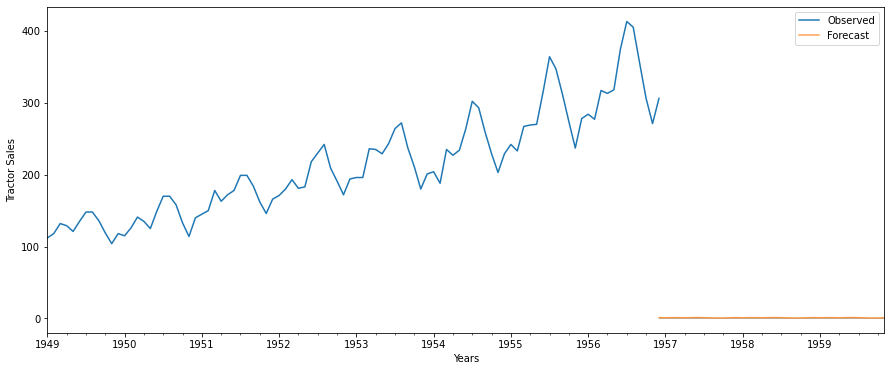

In [346]:
# plot the forecast along with the confidence band
axis = df_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

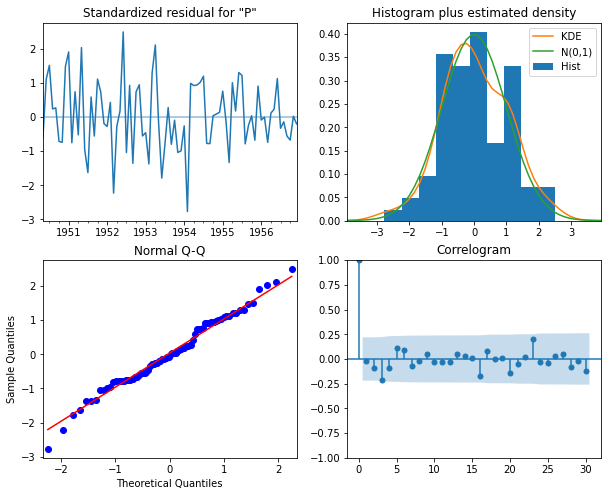

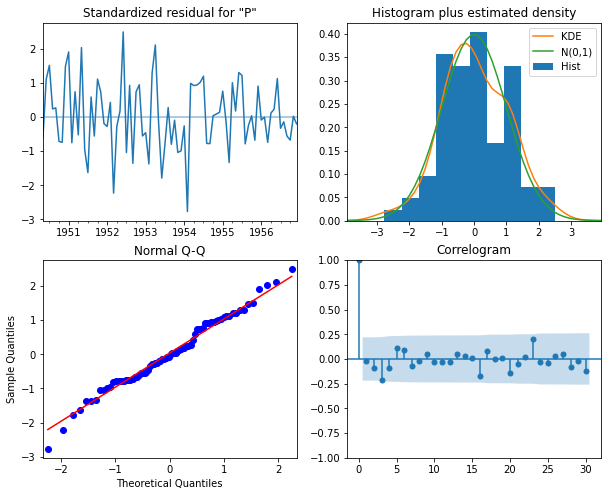

In [347]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))

In [348]:
Train = df.head(81)
Test = df.tail(14)

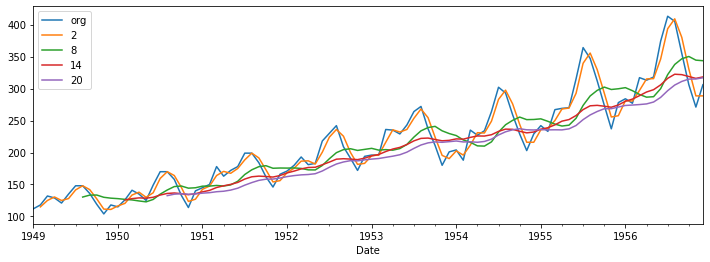

In [349]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [350]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [351]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.894852596201785

In [352]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

15.911732647712952

In [353]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

3.5048190948919946

In [354]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)


2.4005442778583204

In [355]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

10.235210041827575

In [356]:
hwe_model_add_add = ExponentialSmoothing(df["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()


In [357]:
hwe_model_add_add.forecast(10)

1957-01-01    313.152939
1957-02-01    318.436258
1957-03-01    320.388454
1957-04-01    321.033047
1957-05-01    322.612133
1957-06-01    321.604887
1957-07-01    316.697011
1957-08-01    318.490099
1957-09-01    318.315168
1957-10-01    326.547790
Freq: MS, dtype: float64

In [358]:
df

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121
...,...,...,...
1956-08-01,Aug,1956,405
1956-09-01,Sep,1956,355
1956-10-01,Oct,1956,306


In [359]:
df.reset_index(inplace=True)
df['t'] = 1
df

,Date,Month,Year,Passengers,t
0,1949-01-01,Jan,1949,112,1
1,1949-02-01,Feb,1949,118,1
2,1949-03-01,Mar,1949,132,1
3,1949-04-01,Apr,1949,129,1
4,1949-05-01,May,1949,121,1
...,...,...,...,...,...
91,1956-08-01,Aug,1956,405,1
92,1956-09-01,Sep,1956,355,1
93,1956-10-01,Oct,1956,306,1
94,1956-11-01,Nov,1956,271,1


In [360]:
for i,row in df.iterrows():
  df['t'].iloc[i] = i+1

In [361]:
df

,Date,Month,Year,Passengers,t
0,1949-01-01,Jan,1949,112,1
1,1949-02-01,Feb,1949,118,2
2,1949-03-01,Mar,1949,132,3
3,1949-04-01,Apr,1949,129,4
4,1949-05-01,May,1949,121,5
...,...,...,...,...,...
91,1956-08-01,Aug,1956,405,92
92,1956-09-01,Sep,1956,355,93
93,1956-10-01,Oct,1956,306,94
94,1956-11-01,Nov,1956,271,95


In [362]:
df['t_sq'] = (df['t'])**2
## inserted t_sq column with values
df

,Date,Month,Year,Passengers,t,t_sq
0,1949-01-01,Jan,1949,112,1,1
1,1949-02-01,Feb,1949,118,2,4
2,1949-03-01,Mar,1949,132,3,9
3,1949-04-01,Apr,1949,129,4,16
4,1949-05-01,May,1949,121,5,25
...,...,...,...,...,...,...
91,1956-08-01,Aug,1956,405,92,8464
92,1956-09-01,Sep,1956,355,93,8649
93,1956-10-01,Oct,1956,306,94,8836
94,1956-11-01,Nov,1956,271,95,9025


In [363]:
months = pd.get_dummies(df['Month']) ## converting the dummy variables for month column
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [364]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable
Airlines = pd.concat([df,months],axis=1)
Airlines.head()

,Date,Month,Year,Passengers,t,t_sq,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1949-01-01,Jan,1949,112,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1949-02-01,Feb,1949,118,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1949-03-01,Mar,1949,132,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1949-04-01,Apr,1949,129,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1949-05-01,May,1949,121,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [365]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines

,Date,Month,Year,Passengers,t,t_sq,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1949-01-01,Jan,1949,112,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1949-02-01,Feb,1949,118,2,4,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1949-03-01,Mar,1949,132,3,9,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1949-04-01,Apr,1949,129,4,16,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1949-05-01,May,1949,121,5,25,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1956-08-01,Aug,1956,405,92,8464,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,1956-09-01,Sep,1956,355,93,8649,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,1956-10-01,Oct,1956,306,94,8836,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,1956-11-01,Nov,1956,271,95,9025,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


<AxesSubplot:xlabel='Month', ylabel='Year'>

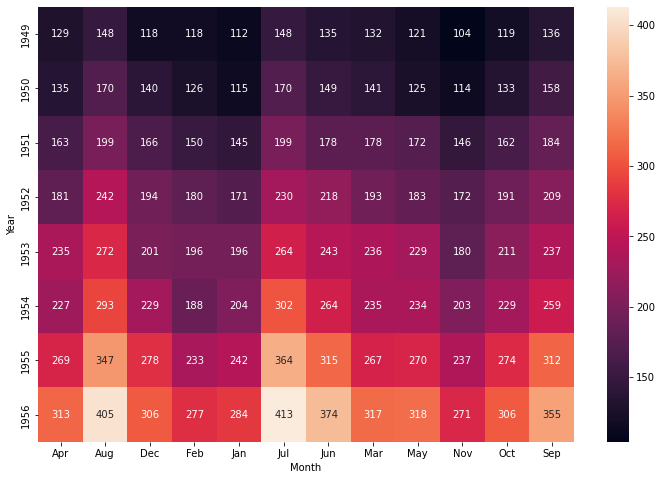

In [368]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

In [369]:
Train = Airlines.head(81) # training data
Test = Airlines.tail(14)

In [370]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.48379883520376

In [371]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.291686646710346

In [372]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.230458424569456